In [22]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import Counter

Load and Preprocess the Dataset

In [2]:
from google.colab import drive

Mount and load dataset


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [ ]:
DATA_DIR=('/content/drive/MyDrive/WildAnimals')

In [6]:
def load_image(DATA_DIR):
  catagories=os.listdir(DATA_DIR)
  return catagories

ConveGrey scale conversion and Flatten Images for k-NN

In [ ]:
def load_images_and_labels(data_dir, target_size=(64, 64)):
    data, labels = [], []
    categories = os.listdir(data_dir)
    for category in categories:
        category_path = os.path.join(data_dir, category)
        label = categories.index(category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) 
                img = cv2.resize(img, target_size)
                data.append(img.flatten())
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
    return np.array(data), np.array(labels)

In [8]:
images, labels = load_images_and_labels(DATA_DIR)
print("Data loaded successfully!")
print(f"Image Shape: {images.shape}, Labels Shape: {labels.shape}")



Data loaded successfully!
Image Shape: (170, 4096), Labels Shape: (170,)


Define the Euclidean Distance Function

In [9]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


 Implement k-NN Prediction

In [19]:
def knn_predict(test_sample, train_data, train_labels, k):
    distances = [euclidean_distance(test_sample, x) for x in train_data]
    k_neighbors = np.argsort(distances)[:k]
    k_neighbor_labels = [train_labels[i] for i in k_neighbors]
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]


Perform 5-Fold Cross-Validation for Each K

In [11]:
def knn_cross_validation(X, y, k_values):
    kf = KFold(n_splits=5)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            correct_predictions = 0
            for i, test_sample in enumerate(X_val):
                prediction = knn_predict(test_sample, X_train, y_train, k)
                if prediction == y_val[i]:
                    correct_predictions += 1

            fold_accuracy = correct_predictions / len(y_val)
            fold_accuracies.append(fold_accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        avg_accuracies.append(avg_accuracy)

    return avg_accuracies


Cross-validation KNN

In [ ]:
k_values = [1, 3, 5, 7, 9]  # Test different k values
avg_accuracies = knn_cross_validation(images, labels, k_values)

In [ ]:
Plot the Average Accuracy vs. K

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracies, marker='o', color='b', label='Average Accuracy')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Average Accuracy")
plt.title("k-NN Classification Accuracy vs. Number of Neighbors (K)")
plt.legend()
plt.grid(True)
plt.show()


 Plot the Average Accuracy vs. K

Average accuracy for k=1: 0.0235
Average accuracy for k=3: 0.0176
Average accuracy for k=5: 0.0235
Average accuracy for k=7: 0.0059
Average accuracy for k=9: 0.0118


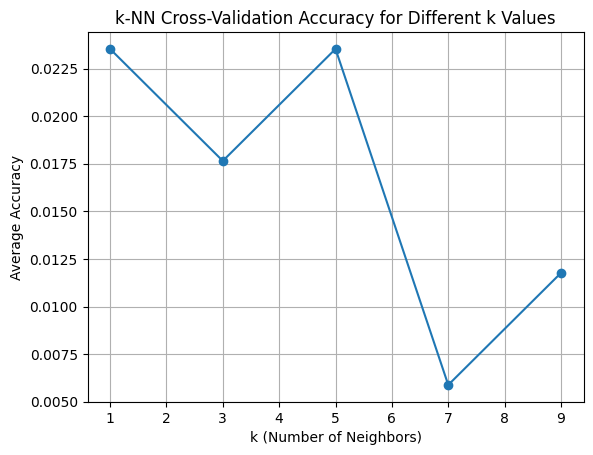

In [ ]:
for k, accuracy in zip(k_values, avg_accuracies):
    print(f"Average accuracy for k={k}: {accuracy:.4f}")

# Optionally, plot the results
plt.plot(k_values, avg_accuracies, marker='o')
plt.title('k-NN Cross-Validation Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()